### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a T test

### Load Dataframe

In [69]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [70]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Checking Dataframe shape

In [71]:
df.shape

(4269, 13)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Data Summary

In [73]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Data Cleaning

### Checking for duplicates

In [74]:
df.duplicated(keep=False).sum()

0

### Convert Values in a column in Absolute values

In [75]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

### Remove Whitespace from columns

In [76]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [77]:
# Handle Missing Values
# For numerical columns, fill missing values with the mean
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [78]:
# For categorical columns, fill missing values with the most frequent value
categorical_columns = df.select_dtypes(include=[object]).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4269 non-null   float64
 1   no_of_dependents          4269 non-null   float64
 2   education                 4269 non-null   object 
 3   self_employed             4269 non-null   object 
 4   income_annum              4269 non-null   float64
 5   loan_amount               4269 non-null   float64
 6   loan_term                 4269 non-null   float64
 7   cibil_score               4269 non-null   float64
 8   residential_assets_value  4269 non-null   float64
 9   commercial_assets_value   4269 non-null   float64
 10  luxury_assets_value       4269 non-null   float64
 11  bank_asset_value          4269 non-null   float64
 12  loan_status               4269 non-null   object 
dtypes: float64(10), object(3)
memory usage: 433.7+ KB


## Adding New Colums to the Dataframe

### Adding CIBIL Rating column

In [80]:
# Adding CIBIL Rating column with values (Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"

df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

### Adding Income Level Column

In [81]:
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low-Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper-Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High Income"

df['Income level'] = df['income_annum'].apply(income_level)

### Adding Loan Rating Column

In [82]:
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return "Unknown"

df['Loan Rating'] = df['loan_amount'].apply(loan_rating)

### Adding Loan Term Column

In [83]:
def loan_term(value):
    if 0 <= value <= 7:
        return "Short Term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long Term"
    else:
        return "Unknown"

df['Loan Term Type'] = df['loan_term'].apply(loan_term)

### Adding Dependents Level Column

In [84]:
def dependents(value):
    if 0 <= value <= 1:
        return "Low"
    elif 2 <= value <= 3:
        return "Moderate"
    elif 4 <= value <= 5:
        return "High"
    else:
        return "Unknown"

df['Dependent Level'] = df['no_of_dependents'].apply(dependents)

In [85]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating,Income level,Loan Rating,Loan Term Type,Dependent Level
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected,Poor,High,Gold,Long Term,Moderate
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected,Poor,High,Gold,Long Term,High


## Exploratory Data Analysis

### Customer Segmentation

### Segment according to Income

In [86]:
# Group data based on income level

income = df['Income level'].value_counts().reset_index()
income = income.rename(columns={'Income level':'Income Levels', 'count': "Number of Applicants"})
income

,Income Levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


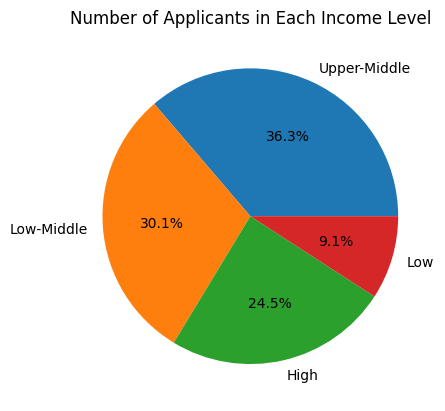

In [87]:
# Ploting the pie chart
plt.pie(income['Number of Applicants'], labels=income['Income Levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

### Segment according to Dependents

In [88]:
# Group based on Number of dependents

dependents = df['Dependent Level'].value_counts().reset_index()
dependents = dependents.rename(columns={'count': "Number of Applicants"})
dependents

,Dependent Level,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


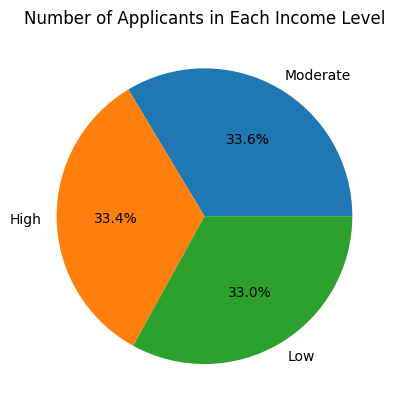

In [89]:
# Ploting the pie chart
plt.pie(dependents['Number of Applicants'], labels=dependents['Dependent Level'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

### Segment according to Education

In [90]:
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'education':'Education Levels', 'count': "Number_of_Applicants"})
education

,Education Levels,Number_of_Applicants
0,Graduate,2144
1,Not Graduate,2125


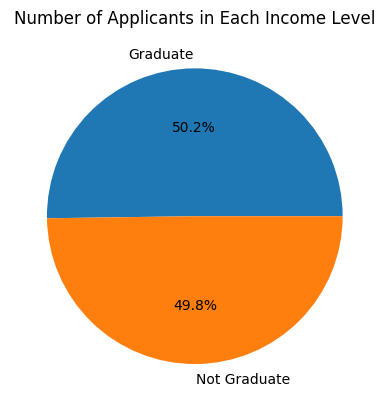

In [91]:
# Ploting the pie chart
plt.pie(education['Number_of_Applicants'], labels=education['Education Levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

### Segment according to Employment

In [92]:
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'self_employed':'Self Employed', 'count': "Number_of_Applicants"})
employment

,Self Employed,Number_of_Applicants
0,Yes,2150
1,No,2119


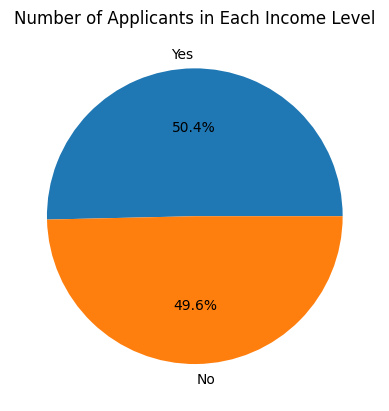

In [93]:
# Ploting the pie chart
plt.pie(employment['Number_of_Applicants'], labels=employment['Self Employed'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

## Rate of Loan Approval

### Overall Rate

In [94]:
loans = df['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'loan_status':'Loan Status', 'count': "Total"})
loans

,Loan Status,Total
0,Approved,2656
1,Rejected,1613


### Loan Approval according to Level of Education

In [95]:
# Grouping data based on Level of Education and Loan approval Status
education = df.groupby(['education', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
education = education[education['loan_status'].isin(['Approved', 'Rejected'])]

# Encode loan_status to numeric values
education['loan_status'] = education['loan_status'].replace({'Approved', 'Rejected'})
education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


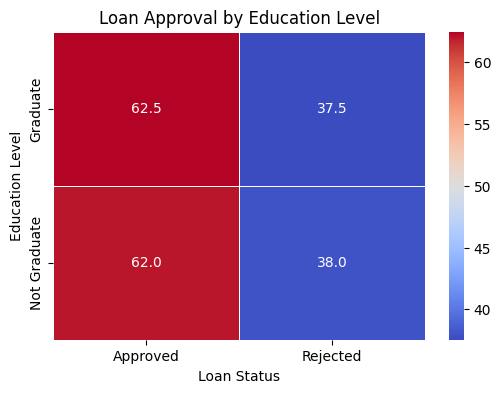

In [96]:
# Pivot Table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Education Level")
plt.xlabel("Loan Status")
plt.ylabel("Education Level")

plt.show()

### Loan Approval according to the type of Employment

In [97]:
# Grouping data based on the Type of Employment and Loan approval Status
employment = df.groupby(['self_employed', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
employment = employment[employment['loan_status'].isin(['Approved', 'Rejected'])]
employment = employment.rename(columns={0:'Total'})

employment

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


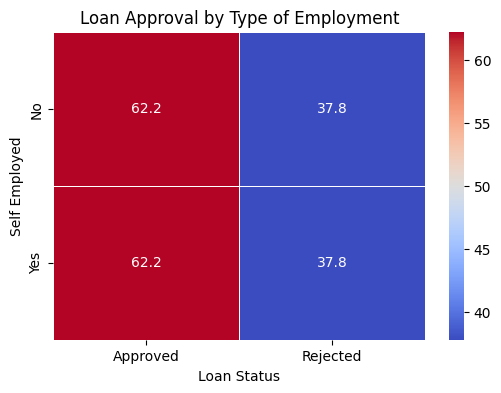

In [98]:
# Pivot Table
pivot_table = employment.pivot(index='self_employed', columns='loan_status', values='Total')
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Type of Employment")
plt.xlabel("Loan Status")
plt.ylabel("Self Employed")

plt.show()

## Loan Approval Rate by CIBIL Rating

### The influence of CIBIL Rating on loan approvals

In [99]:
# Grouping data based on the CIBIL Rating and Loan approval Status
cibil_rating = df.groupby(['CIBIL_rating', 'loan_status']).size().reset_index()
cibil_rating = cibil_rating.rename(columns={0:'Total'})

cibil_rating

,CIBIL_rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


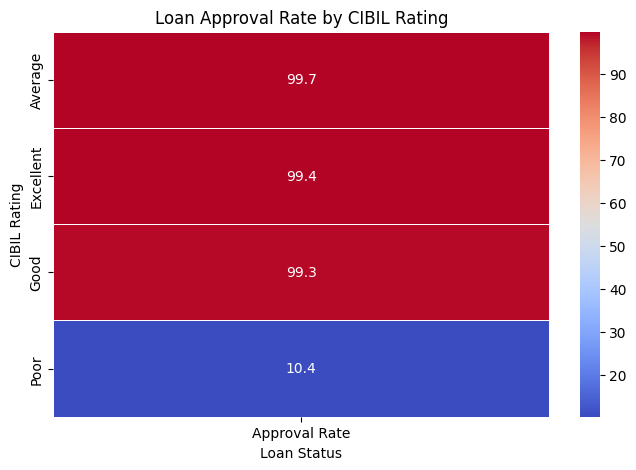

In [100]:
# Pivot Table
pivot_table = cibil_rating.pivot(index='CIBIL_rating', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

# Creating heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval Rate by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")

plt.show()

## Correlation Analysis

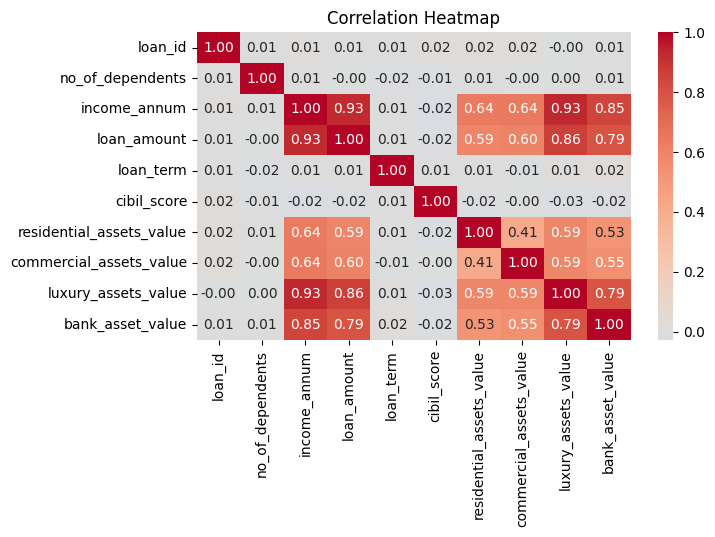

In [101]:
correlation_matrix = df.corr(numeric_only=True)

# Creating heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', center=0, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [102]:
# Correlation between asset value and income
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [income]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [103]:
# Correlation between asset value and Loan
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [loan]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


## Asset value impact/Influence on loan approval

### If there's a relation between asset value and getting a loan approval

### Using ANOVA to determine a correlation between asset value and income

In [133]:
# Null Hypothesis: There is no relation(Significant influence) between assets and income.
# Alternate Hypothesis: There is a relation(Significant Influence) between assets and income.

# Extracting values in the columns
residential_asset = df['residential_assets_value']
commercial_asset = df['commercial_assets_value']
luxury_asset = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']

# Performing ANOVA
f_statistics, p_value = f_oneway(residential_asset, commercial_asset, luxury_asset, bank_asset, income)

print(f"The F-Statistics: {f_statistics}")
print(f"P-Value: {p_value}")

# interpretation of results
if p_value < 0.05:
    print("There is a significant influence of income on assets.")
else:
    print("There is no signinficant influence of income on assets.")

The F-Statistics: 2518.654468935116
P-Value: 0.0
There is a significant influence of income on assets.


### Correlation between assets and income

In [106]:
# Splitting data into groups
income = df['income_annum']
loan = df['loan_amount']


t_stat, p_value = ttest_ind(income, loan, equal_var=False)

print(f"  T-statistic: {t_stat}")
print(f"  P-Value: {p_value}")
if p_value < 0.05: # 95% Confidence Interval
    print(f"The difference in {column} between approved and rejected loans is statistically significant.")
else:
    print(f"The difference in {column} between approved and rejected loans is not statistically significant.")


  T-statistic: -69.51489699866843
  P-Value: 0.0
The difference in bank_asset_value between approved and rejected loans is statistically significant.


#### Box plot to represent the relation between assets and income

## Logistic Regression

In [107]:
def edu_status(status):
    if status == "Graduate":
        return 1
    elif status == "Not Graduate":
        return 0
    else:
        return "Unknown"
df['edu_status'] = df['education'].apply(edu_status)

def type_employment(employment):
    if employment == "Yes":
        return 1
    elif employment == "No":
        return 0
    else:
        return "Unknown"
df['type_employment'] = df['self_employed'].apply(type_employment)

def loan_approval(status):
    if status == "Approved":
        return 1
    elif status == "Rejected":
        return 0
    else:
        return "Unknown"
df['loan_approval'] = df['loan_status'].apply(loan_approval)

In [108]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,CIBIL_rating,Income level,Loan Rating,Loan Term Type,Dependent Level,edu_status,type_employment,loan_approval
0,1.0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,...,8000000.0,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2.0,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,...,3300000.0,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3.0,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,...,12800000.0,Rejected,Poor,High,Gold,Long Term,Moderate,1,0,0
3,4.0,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,...,7900000.0,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5.0,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,...,5000000.0,Rejected,Poor,High,Gold,Long Term,High,0,1,0


In [109]:
# Seperating the x-axis values

X = df.drop(columns=['loan_id', 'education', 'CIBIL_rating', "Income level",
                     "Loan Rating", 'Loan Term Type', 'Dependent Level', 'loan_status', "loan_approval", 'self_employed'])

X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu_status,type_employment
0,2.0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,1,0
1,0.0,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,0,1
2,3.0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1,0
3,3.0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1,0
4,5.0,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5.0,1000000.0,2300000.0,12.0,317.0,2800000.0,500000.0,3300000.0,800000.0,1,1
4265,0.0,3300000.0,11300000.0,20.0,559.0,4200000.0,2900000.0,11000000.0,1900000.0,0,1
4266,2.0,6500000.0,23900000.0,18.0,457.0,1200000.0,12400000.0,18100000.0,7300000.0,0,0
4267,1.0,4100000.0,12800000.0,8.0,780.0,8200000.0,700000.0,14100000.0,5800000.0,0,0


In [110]:
# Define the y-axis
y = df['loan_approval']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_approval, dtype: int64

### Importing the Logistic Regression modules

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [112]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [113]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_train_scaled

array([[-1.46148376,  1.48642509,  1.54664878, ...,  0.32060948,
        -1.00268097,  0.99266412],
       [ 1.47642896,  0.02091063,  0.58652234, ..., -0.44959563,
         0.9973262 , -1.00739009],
       [-0.87390121, -1.15864979, -1.20129933, ..., -1.18899253,
        -1.00268097,  0.99266412],
       ...,
       [-0.87390121,  1.16472679,  1.01692385, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [ 0.30126387,  0.12814339,  0.56445046, ...,  0.96758177,
        -1.00268097, -1.00739009],
       [-0.87390121,  1.5579136 ,  0.50927078, ...,  0.35141768,
        -1.00268097, -1.00739009]])

In [115]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ..., -1.43545817,
         0.9973262 , -1.00739009],
       [-0.87390121,  0.66430722,  0.54237859, ...,  0.13576025,
        -1.00268097,  0.99266412],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  1.1832392 ,
         0.9973262 , -1.00739009],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ...,  1.64536226,
        -1.00268097,  0.99266412],
       [ 1.47642896,  1.66514636,  2.48470336, ...,  0.35141768,
        -1.00268097,  0.99266412],
       [-0.28631867, -0.01483363,  0.15612082, ..., -0.20313   ,
        -1.00268097,  0.99266412]])

In [116]:
# Training the data

log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [117]:
scores = []
names = []
names.append("Logisitic Regression")

In [118]:
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1])

In [119]:
log_reg.score(X_train_scaled, y_train)

0.9200133868808568

In [120]:
# Application of model to a new dataset
log_reg_train_score = log_reg.score(X_train_scaled, y_train)
print("Logistic Regression Training Accuracy: ", log_reg_train_score)

log_reg_score = log_reg.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy: ", log_reg_score)

Logistic Regression Training Accuracy:  0.9200133868808568
Logistic Regression Accuracy:  0.912568306010929


In [121]:
scores.append(log_reg_score)

### Random Forest

In [122]:
clf = RandomForestClassifier()
names.append("RandomForest")
clf.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
y_pred = clf.predict(X_train)
train_score = accuracy_score(y_train, y_train)
scores.append(train_score)
print("Training Accuracy: ", train_score)

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)
print("Accuracy: ", score)

Training Accuracy:  1.0
Accuracy:  0.9804839968774395


In [131]:
from sklearn.naive_bayes import GaussianNB

# Training Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Evaluate the model

nb_train_score = nb.score(X_train_scaled, y_train)
print("Naive Bayes Training Accuracy: ", nb_train_score)

nb_score = nb.score(X_test_scaled, y_test)
print("Naive Bayes Testing Accuracy: ", nb_score)

Naive Bayes Training Accuracy:  0.9354082998661312
Naive Bayes Testing Accuracy:  0.9258391881342701


In [125]:
from sklearn.svm import SVC

# Training Support Vector Machine (SVM) model
svm = SVC(kernel='linear')  # You can choose different kernels like 'rbf' or 'poly' as well
svm.fit(X_train_scaled, y_train)

svm_train_score = svm.score(X_train_scaled, y_train)
print("SVM Training Accuracy: ", svm_train_score)

# Evaluate the model
svm_score = svm.score(X_test_scaled, y_test)
print("SVM Accuracy: ", svm_score)

SVM Training Accuracy:  0.9307228915662651
SVM Accuracy:  0.9180327868852459


### Model  Comparison

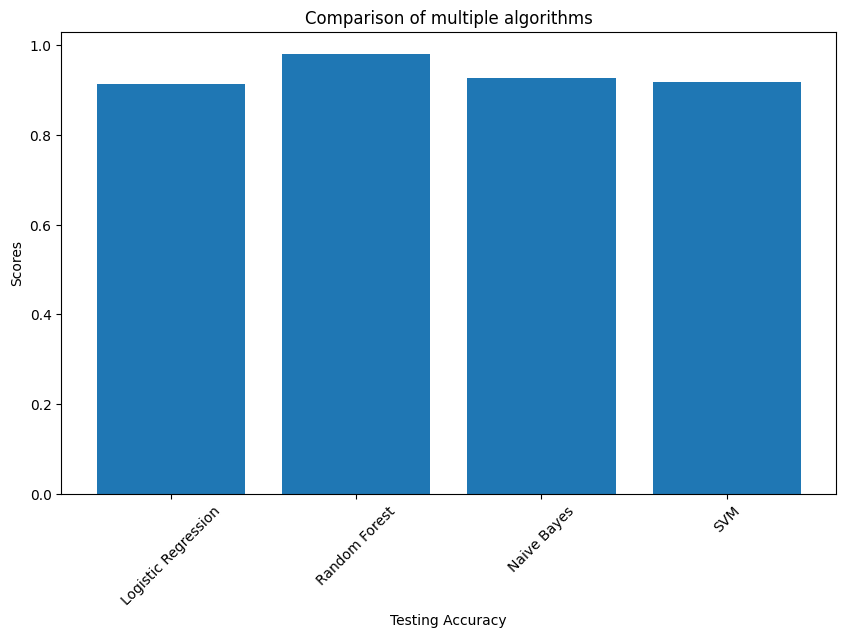

In [130]:


# Plotting the comparison of multiple algorithms
names = ["Logistic Regression", "Random Forest", "Naive Bayes", "SVM"]
scores = [log_reg_score, score, nb_score, svm_score]


plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(names, scores)
plt.xlabel("Testing Accuracy")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

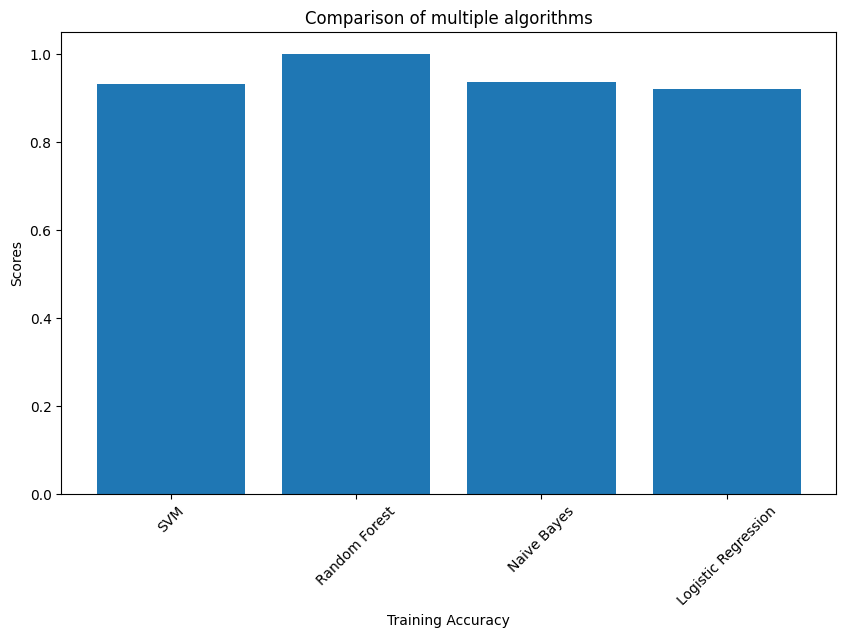

In [128]:

# Plotting the comparison of multiple algorithms
names = ["SVM", "Random Forest", "Naive Bayes", "Logistic Regression"]
train_scores = [svm_train_score,train_score,nb_train_score,log_reg_train_score]

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(names, train_scores)
plt.xlabel("Training Accuracy")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

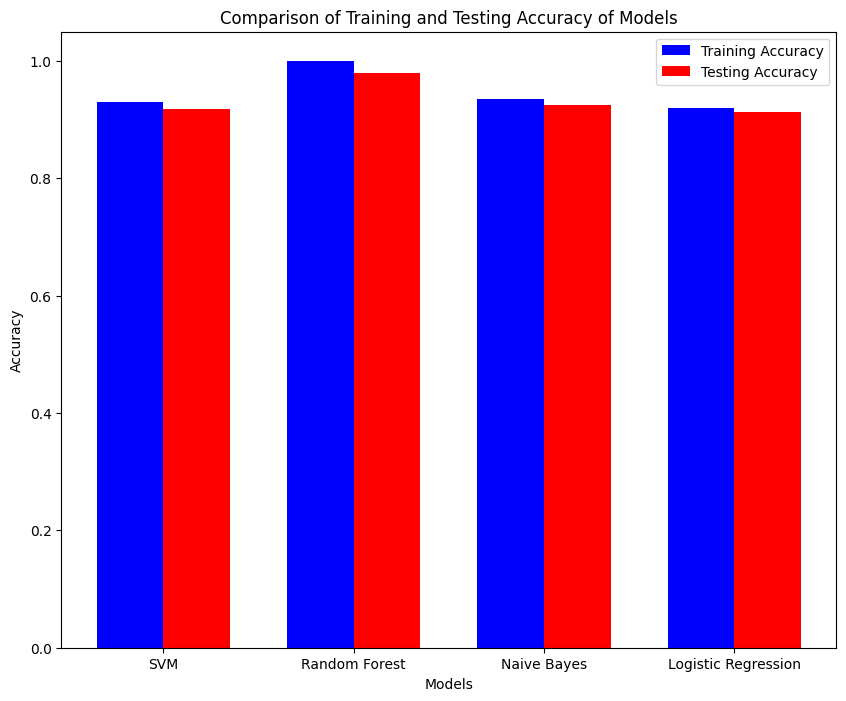

In [132]:

# Define the model names and their corresponding training and testing accuracy scores
models = ['SVM', 'Random Forest','Naive Bayes','Logistic Regression']
training_accuracy = [svm_train_score,train_score,nb_train_score,log_reg_train_score]
testing_accuracy = [svm_score, score, nb_score, log_reg_score]

# Create a bar graph to compare the training and testing accuracy of different models
plt.figure(figsize=(10, 8))
bar_width = 0.35
index = range(len(models))

plt.bar(index, training_accuracy, bar_width, label='Training Accuracy', color='b')
plt.bar([i + bar_width for i in index], testing_accuracy, bar_width, label='Testing Accuracy', color='r')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracy of Models')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()

plt.show()